In [13]:
import numpy as np
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
tracks_orig = pd.read_json("../data/tracks.json")

# Preprocess tracks data

In [15]:
from src.track_preprocessor.VAEPreprocessor import VAEPreprocessor
from src.recommender_playlist_provider.common.CallType import CallType

In [16]:
vae_preprocessor = VAEPreprocessor()

In [17]:
tracks_orig.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.586,0.000000,0.332,0.713,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.947,0.000009,0.321,0.134,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.984,0.000358,0.156,0.169,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.840,0.000002,0.788,0.590,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.950,0.276000,0.152,0.100,90.150


In [18]:
tracks_ids = tracks_orig.id
tracks_ids

0        0RNxWy0PC3AyH4ThH3aGK6
1        2W889aLIKxULEefrleFBFI
2        4Pnzw1nLOpDNV6MKI5ueIR
3        7GLmfKOe5BfOXk7334DoKt
4        6kD1SNGPkfX9LwaGd1FG92
                  ...          
22407    0LcNMuOiULmxJK3bdHTfDF
22408    1uviKYHZuM4uINK33F7sCt
22409    1fXmDeiCb3ABt5CzkMxp4u
22410    27kcZEJvhkb1rzZS9gCpdA
22411    27Y1N4Q4U3EfDU5Ubw8ws2
Name: id, Length: 22412, dtype: object

In [19]:
preprocessed_tracks = vae_preprocessor.preprocess_tracks(tracks_data=tracks_orig, call_type=CallType.TRAINING)
preprocessed_tracks

,duration_ms,popularity,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,2,3,4,5,6,7,8,9,10,11
0,-0.397693,-0.792191,-0.447118,-5.542188,0.466992,-1.293191,-1.857878,-0.147948,1.152614,-0.263179,...,0,0,0,0,0,0,0,0,0,0
1,-0.445783,-0.916444,-0.447118,-4.536483,-2.496578,-2.371576,-2.847975,-0.460325,2.460088,-0.263119,...,1,0,0,0,0,0,0,0,0,0
2,-0.431913,-0.792191,-0.447118,-4.464647,-1.921557,-2.697954,-3.309985,-0.517426,2.594095,-0.260837,...,0,0,0,0,0,0,0,0,0,0
3,-0.931261,-0.916444,-0.447118,-4.464647,-0.240726,-1.493599,-1.042471,-0.369635,2.072554,-0.263169,...,0,0,0,0,0,0,0,1,0,0
4,-0.609833,-1.040697,-0.447118,-4.464647,-2.540810,-2.831560,-4.070282,-0.540938,2.470953,1.542815,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,-0.210160,0.450344,-0.447118,0.923058,-0.392380,-0.004855,-0.046488,-0.347242,-0.361304,-0.263179,...,1,0,0,0,0,0,0,0,0,0
22408,-0.434701,1.071611,-0.447118,0.994894,-0.670412,-0.892375,-0.355208,-0.417779,2.090663,-0.263179,...,1,0,0,0,0,0,0,0,0,0
22409,-0.475356,0.201837,-0.447118,0.994894,-0.133305,0.438905,0.566137,-0.121076,-0.926669,-0.263179,...,1,0,0,0,0,0,0,0,0,0
22410,-0.385376,0.698851,-0.447118,0.994894,-0.057478,-0.978264,0.410439,-0.119957,1.268512,-0.263179,...,0,0,0,0,0,0,0,0,0,0


### Train VAE

In [20]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, decomposition, manifold, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from tensorflow.keras import layers
import pickle
import time
from numpy import load
from matplotlib import pyplot
import pickle
import argparse

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

from tensorflow.compat.v1.keras.layers import Input, Dense, LeakyReLU, Conv2D, MaxPooling2D, UpSampling2D,  Concatenate
from tensorflow.compat.v1.keras.models import Model
from tensorflow.compat.v1.keras.layers import Dense, Reshape, Flatten
from tensorflow.compat.v1.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import mse, binary_crossentropy, logcosh
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

from scipy.stats import wasserstein_distance
import pandas as pd
from sklearn.metrics import mean_absolute_error
from datetime import datetime

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.10.1


In [21]:
############################ Define Models ############################
input_dim = 25
latent_dim = 128

############################ encoder ############################
input_features = keras.Input(shape=(input_dim, ), name="input_features")

x = Dense(64, activation="relu")(input_features)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(32, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

latent = Dense(latent_dim, name="latent")(x)

encoder = keras.Model(inputs=input_features, outputs=latent, name="encoder")
encoder.summary()

############################ decoder ############################
latent_inputs = Input(shape=(latent_dim,), name="z")
x = Dense(32, activation="relu")(latent_inputs)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
outputs = Dense(input_dim, activation="linear")(x)

# Define the VAE model
decoder = keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

# Print the summary of the models
decoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 25)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1664      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                           

In [22]:
def reconstruction_loss(inputs, reconstructed):
    mse = tf.keras.losses.MeanAbsoluteError()
    loss = mse(inputs, reconstructed)
    return loss

@tf.function
def train_step(inputs_batch):
    with tf.GradientTape() as tape:
        latent = encoder(inputs_batch)
        reconstruction = decoder(latent)
        reconstruction_losses = reconstruction_loss(inputs_batch, reconstruction)
        total_loss = reconstruction_losses

    grads = tape.gradient(total_loss, decoder.trainable_weights+encoder.trainable_weights)
    vae_optimizer.apply_gradients(zip(grads, decoder.trainable_weights+encoder.trainable_weights))
    return total_loss

def train(train_dataset, epochs):
    step=0
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for input_batch in train_dataset:
            loss = train_step(input_batch)
            epoch_loss += loss
            step += 1
        losses.append(loss)
        print(f"Epoch {epoch + 1}: Loss = {epoch_loss / len(train_dataset):.4f}")
    return losses

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices(preprocessed_tracks.values).batch(256)
train_dataset = train_dataset.shuffle(1024)

# train_dataset = train_dataset.map(lambda x: (tf.reshape(x, [-1, 25]), x))
vae_optimizer = tf.keras.optimizers.Adam()

In [24]:
loss = train(train_dataset, epochs=100)

Epoch 1: Loss = 0.3872
Epoch 2: Loss = 0.3171
Epoch 3: Loss = 0.2861
Epoch 4: Loss = 0.2539
Epoch 5: Loss = 0.2351
Epoch 6: Loss = 0.2167
Epoch 7: Loss = 0.2087
Epoch 8: Loss = 0.1957
Epoch 9: Loss = 0.1987
Epoch 10: Loss = 0.1901
Epoch 11: Loss = 0.1864
Epoch 12: Loss = 0.1883
Epoch 13: Loss = 0.1792
Epoch 14: Loss = 0.1714
Epoch 15: Loss = 0.1611
Epoch 16: Loss = 0.1517
Epoch 17: Loss = 0.1515
Epoch 18: Loss = 0.1467
Epoch 19: Loss = 0.1497
Epoch 20: Loss = 0.1361
Epoch 21: Loss = 0.1396
Epoch 22: Loss = 0.1362
Epoch 23: Loss = 0.1357
Epoch 24: Loss = 0.1287
Epoch 25: Loss = 0.1273
Epoch 26: Loss = 0.1362
Epoch 27: Loss = 0.1277
Epoch 28: Loss = 0.1333
Epoch 29: Loss = 0.1256
Epoch 30: Loss = 0.1255
Epoch 31: Loss = 0.1301
Epoch 32: Loss = 0.1264
Epoch 33: Loss = 0.1251
Epoch 34: Loss = 0.1199
Epoch 35: Loss = 0.1238
Epoch 36: Loss = 0.1250
Epoch 37: Loss = 0.1192
Epoch 38: Loss = 0.1153
Epoch 39: Loss = 0.1186
Epoch 40: Loss = 0.1164
Epoch 41: Loss = 0.1224
Epoch 42: Loss = 0.1229
E

Text(0.5, 0, 'epoch')

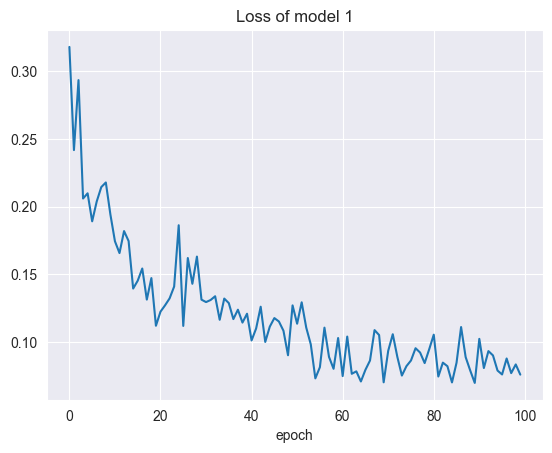

In [34]:
sns.lineplot([x.numpy() for x in loss])
plt.title("Loss of model 1"); plt.xlabel('epoch')

ONLY reconstruction loss
* Batch norm and dropout
    * 64 latent space | 200 epochs | 0.1654 loss
    * 128 latent space | 200 epochs | 0.1511 loss
* Without batch norm and dropout
    * 64 latent space | 200 epochs | 0.0797 loss   | no intersection between recommended and listened for 40 recommendations
    * 128 latent space | 200 epochs | 0.1397 loss  |

### Save model weights

In [ ]:
MODELS_PATHS = "models/encoder/"
encoder.compile()
encoder.save((os.path.join(MODELS_PATHS, "encoder_v4.h5")))

### Produce embeddings of all tracks in a latent space and save them

In [ ]:
all_tracks = preprocessed_tracks.values
print(all_tracks.shape)
tracks_latent_space = encoder.predict(all_tracks)
# tracks in latent space
print(tracks_latent_space.shape)
# Save the ndarray to a file
np.save('models/encoder/embeddings_of_all_tracks.npy', tracks_latent_space)

### Save ids of all tracks in the same order as embeddings

In [ ]:
np.save('models/encoder/track_ids.npy', tracks_ids.values)

### Load model

In [ ]:
MODELS_PATHS = "../../models/"
MODEL = (os.path.join(MODELS_PATHS, "encoder_3.h5"))
encoder = tf.keras.models.load_model(MODEL, compile=True)

# Validation and tests

### Get some track from user 108

In [ ]:
from src.user_sessions_fetcher.common.UserSessionsProvider import UserSessionsProvider

from src.user_sessions_fetcher.common.constants import (EVENT_TYPE_PLAY, EVENT_TYPE_LIKE)
usp = UserSessionsProvider("../../../data/test")
session_track_ids_user_108_like = usp.get_user_sessions(108, [EVENT_TYPE_LIKE], 'last')
session_track_ids_user_108_like

### Test VAEPlaylistProvider

In [43]:
from src.recommender_playlist_provider.vae.VAEPlaylistProvider import VAEPlaylistProvider

In [45]:
vae_pp = VAEPlaylistProvider(model_path="../../models/encoder_3.h5")

In [46]:
vae_pp.load_model_from_file()

In [47]:
features_tracks = vae_pp.get_features_of_track_ids(session_track_ids_user_108_like)
features_tracks

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
107,78JmElAFmrPNhLjovDR9Jm,All Day and All of the Night,69,141507,0,1SQRv42e4PjEYfPhS0Tk9E,1964-10-02,0.551,0.860,7,-7.839,0.0796,0.26200,0.000005,0.0558,0.7230,136.921
255,0NWPxcsf5vdjdiFUI8NgkP,Hey Joe,72,210160,0,776Uo845nYHJpNaStv1Ds4,1967-05-12,0.346,0.768,9,-5.695,0.0377,0.00603,0.380000,0.0244,0.5320,169.492
450,4ZkhFcoS3apzze9w2yI9NO,Thank You - 1990 Remaster,57,289467,0,36QJpDe2go2KgaRleHCDTp,1969-10-22,0.316,0.270,7,-14.429,0.0590,0.17100,0.002250,0.1650,0.0956,78.476
613,4rylUVBblCUdmtDuYql6oI,Don't Let It Bring You Down,51,176867,0,6v8FB84lnmJs434UJf2Mrm,1970-08-31,0.662,0.237,5,-11.851,0.0369,0.50200,0.000003,0.1070,0.2800,133.074
637,3BqqF8suAIzW8655yJfcvh,Morning Has Broken,70,200000,0,08F3Y3SctIlsOEmKd6dnH8,1971-01-01,0.424,0.321,7,-13.162,0.0312,0.62200,0.019600,0.0903,0.4050,133.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17733,7D8aQaRzoi9Qzz5yerVK5b,Throw A Fit,65,158757,1,0NIIxcxNHmOoyBx03SfTCD,2018-07-27,0.888,0.586,0,-6.745,0.0604,0.00597,0.036500,0.1530,0.4010,150.051
18266,58WOkUl3O9LvLZjdhiQvIX,El Mismo Sol,57,179507,0,2urF8dgLVfDjunO0pcHUEe,2016-07-15,0.732,0.820,8,-5.948,0.0427,0.32300,0.003490,0.0868,0.9780,112.991
18649,67v0HTNTkJmbhxOipBunXe,Para Que Seas Feliz,52,289907,0,3tJnB0s6c3oXPq1SCCavnd,1996-01-01,0.689,0.309,5,-11.465,0.0290,0.49700,0.000027,0.1050,0.3460,89.977
19767,6Awg3vdlBZnLnVWBcyG0vW,Runaway (U & I),58,227074,0,4sTQVOfp9vEMCemLw50sbu,2015-06-05,0.506,0.805,1,-4.119,0.0469,0.00711,0.001930,0.0856,0.3830,126.008


In [60]:
track_recommendations = vae_pp.predict_recommendations(session_track_ids_user_108_like, 40)

2/2 [==============================] - 0s 6ms/step


C:\Users\PB\.conda\envs\tf\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [61]:
track_recommendations

array(['2rKcC5vlTsDM94RWTPoyHV', '5eALoO9RRACvoxvLKF9zt4',
       '1iN1knAnE9tgY3FipGocKX', '4scS449npSaFolwj9b4RJD',
       '0NWPxcsf5vdjdiFUI8NgkP', '4rylUVBblCUdmtDuYql6oI',
       '3BqqF8suAIzW8655yJfcvh', '6vw2D0AeWBSJhJi0OrnudX',
       '26dOCdbA4tZIJh9pGOLuHx', '7safX55XidhznxK5eDdDm5',
       '7D8aQaRzoi9Qzz5yerVK5b', '1LitgN2tFmNVEtLY6qh5SZ',
       '4ZkhFcoS3apzze9w2yI9NO', '0b7ZmVPawkWSRxQlaLTo3J',
       '6bLy8YiVKRpUzwWZG6lVDq', '5U4wYRHrCRxRP6iQfM824C',
       '0mHyWYXmmCB9iQyK18m3FQ', '6Q6YqGj1Ku1CUGHWSFwSHY',
       '78JmElAFmrPNhLjovDR9Jm', '2O2ii9OPZYh1NBXo9FtE0Y',
       '2lKA9bNdd4kAoeHiufa0aK', '6rROXfjFzQyH2w9FAiVkq7',
       '095MMFhB9qxPx2VsmvjnUs', '1d5UuboIPRMD4HaU3yycKC',
       '44ADyYoY5liaRa3EOAl4uf', '33rh7azo556EGptA220qxT',
       '1T8f6NtVBK3f4jcKgCjnvw', '0OtgQMnnZL5KVjpABf6SdR',
       '5N877LRsRxO4lHHHWHwoOv', '1MrZ8hGkUWMmT816wPaMgE',
       '4rhQ89gUsCW5ig91qtoDSE', '3AR1c3Dssq51WlGGkuYJNj',
       '1TWfkGrhF7ob0nwB2M6knb', '1jM23jASF0JrhgqYhqCZfl

In [62]:
session_track_ids_user_108_next_month = usp.get_user_sessions(108,
                                                              event_types=[EVENT_TYPE_LIKE, EVENT_TYPE_PLAY],
                                                              period_type='next')
session_track_ids_user_108_next_month

['1uDXGhm8Wgwpmzgm8k1F7r',
 '3TCauNPqFiniaYHBvEVoHG',
 '4E3afPSY5fUEelQS9ppL0e',
 '78KzU9VKRmDrEO6EvZlQRG',
 '3bq8WiQrEXMwPAibYs7tpu',
 '3bq8WiQrEXMwPAibYs7tpu',
 '2VDg6h3Qr3F8UuFVInQxE6',
 '2sY0M3k69oAYz7EOPVRFjo',
 '4FCb4CUbFCMNRkI6lYc1zI',
 '4qVR3CF8FuFvHN4L6vXlB1',
 '4qVR3CF8FuFvHN4L6vXlB1',
 '3QHThjKGMW7y89xIEvB0J4',
 '6SkoBaMd0lzoQjID5aV2d9',
 '7kjsCbksOZotNNHOvKsJJh',
 '7kjsCbksOZotNNHOvKsJJh',
 '7aOFPde65u12EJmh1dr7uL',
 '3ntrdR24dLkKrzSGRv1FlH',
 '7L8WxiOqgVFcrypKyrAPVx',
 '5RELLT2r8WuuLmOFBTZP2b',
 '2uxL6E8Yq0Psc1V9uBtC4F',
 '6DXv7vJPrDRxo3Lnh4bacS',
 '51QEyJI5M7uyd8DOh9tqQY',
 '51QEyJI5M7uyd8DOh9tqQY',
 '3BtvZuzvNbN7OIaUsWIM5M',
 '3BtvZuzvNbN7OIaUsWIM5M',
 '2zMlWt4aYreVczVERFK94w',
 '2DpLoT8qfJdZhsLGFg413r',
 '0fxGA5lxrdYNYoE7yJxTNZ',
 '1T7AiFL9ruKKwlONN35Vh0',
 '2MrWu3Gt6ucsOHC6eE8oLV',
 '0YMzPd9mYx4txOuCnhYUGU',
 '3CX3WMBg6lzWk72bYL29vP',
 '2TEq8wpp3h8FTbjM5zhYKu',
 '3twVQ7o8aw8SmAwqMcm1fZ',
 '2302lUwfZ4S4dVyPOCDFnQ',
 '2302lUwfZ4S4dVyPOCDFnQ',
 '24z528iI9kZu5LbkLainjI',
 

In [63]:
pd.Series(track_recommendations)

0     2rKcC5vlTsDM94RWTPoyHV
1     5eALoO9RRACvoxvLKF9zt4
2     1iN1knAnE9tgY3FipGocKX
3     4scS449npSaFolwj9b4RJD
4     0NWPxcsf5vdjdiFUI8NgkP
5     4rylUVBblCUdmtDuYql6oI
6     3BqqF8suAIzW8655yJfcvh
7     6vw2D0AeWBSJhJi0OrnudX
8     26dOCdbA4tZIJh9pGOLuHx
9     7safX55XidhznxK5eDdDm5
10    7D8aQaRzoi9Qzz5yerVK5b
11    1LitgN2tFmNVEtLY6qh5SZ
12    4ZkhFcoS3apzze9w2yI9NO
13    0b7ZmVPawkWSRxQlaLTo3J
14    6bLy8YiVKRpUzwWZG6lVDq
15    5U4wYRHrCRxRP6iQfM824C
16    0mHyWYXmmCB9iQyK18m3FQ
17    6Q6YqGj1Ku1CUGHWSFwSHY
18    78JmElAFmrPNhLjovDR9Jm
19    2O2ii9OPZYh1NBXo9FtE0Y
20    2lKA9bNdd4kAoeHiufa0aK
21    6rROXfjFzQyH2w9FAiVkq7
22    095MMFhB9qxPx2VsmvjnUs
23    1d5UuboIPRMD4HaU3yycKC
24    44ADyYoY5liaRa3EOAl4uf
25    33rh7azo556EGptA220qxT
26    1T8f6NtVBK3f4jcKgCjnvw
27    0OtgQMnnZL5KVjpABf6SdR
28    5N877LRsRxO4lHHHWHwoOv
29    1MrZ8hGkUWMmT816wPaMgE
30    4rhQ89gUsCW5ig91qtoDSE
31    3AR1c3Dssq51WlGGkuYJNj
32    1TWfkGrhF7ob0nwB2M6knb
33    1jM23jASF0JrhgqYhqCZfl
34    06EgH8Bd

In [64]:
pd.Series(track_recommendations).isin(pd.Series(session_track_ids_user_108_next_month))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

### Few of recommender tracks were listened by user in next month